# Vegetable Image Classification Project
In today's digital era, image classification plays a pivotal role in various domains, from agriculture to culinary arts. The ability to automatically identify and categorize different vegetables from images can significantly benefit farmers, chefs, and consumers alike. Our project aims to address the challenge of vegetable image classification to enhance efficiency in diverse applications.



## Background:
With the increasing availability of image data and the advancements in computer vision, the task of recognizing vegetables from images has gained importance. Accurate classification can aid farmers in monitoring crop health, assist chefs in recipe recommendations, and provide consumers with an interactive grocery shopping experience.



## Problem Description:
The primary challenge we aim to tackle is the development of a robust and accurate vegetable image classification system. This involves training a machine learning model to recognize and categorize various vegetables based on their visual features. The model should be capable of handling diverse datasets, encompassing different types of vegetables, variations in lighting, and various angles of capture.



## Key Objectives:

Train a machine learning model using a labeled dataset of vegetable images.
Achieve high accuracy in classifying a wide range of vegetables commonly found in the market.
Implement the model to handle real-world scenarios, considering variations in lighting conditions and image angles.
Optimize the model for efficiency, enabling quick and accurate predictions.



## Expected Outcomes:

A trained machine learning model capable of accurately classifying vegetable images.
Improved efficiency in crop monitoring for farmers, leading to timely intervention in case of plant diseases or issues.
Enhanced user experience for chefs, providing a tool for quick and accurate vegetable identification for recipe planning.
A foundation for future developments in image classification, potentially expanding to other food categories.



## Significance of the Project:
The successful implementation of this project holds the potential to revolutionize how we interact with vegetables in various fields. From precision agriculture to culinary arts, accurate vegetable image classification can pave the way for innovative applications that positively impact different aspects of our daily lives.

##  Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
import torch.nn as nn
import torchvision
from torchvision import models,transforms,datasets
import time
import glob
import random
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics

# Tensorflow import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, ReLU, Softmax, BatchNormalization, Dropout
from tensorflow.random import set_seed
%matplotlib inline

In [2]:
torch.__version__

'2.1.0+cu118'

In [3]:
import sys
sys.version

'3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]'

Check if GPU is available and if not change the [runtime](https://www.geeksforgeeks.org/how-to-use-google-colab/).

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print('Using gpu: %s ' % torch.cuda.is_available())

Using gpu: True 


In [5]:
set_seed(111) # set random seed

# To supress any warnings during the flow
import warnings
warnings.filterwarnings('ignore')

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
from google.colab import files

files.upload() #this will prompt you to upload the kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"changhaozhou","key":"fcdc228ce1e210e7f83e78b046569348"}'}

In [8]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!pwd

-rw-r--r-- 1 root root 68 Dec  9 03:56 kaggle.json
/content


In [9]:
!kaggle datasets download -d MISRAKAHMED/Vegetable-Image-Dataset

 99% 529M/534M [00:07<00:00, 87.6MB/s]
100% 534M/534M [00:07<00:00, 75.3MB/s]


In [10]:
!unzip Vegetable-Image-Dataset.zip

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetable Images/train/Radish/0018.jpg  
 

In [ ]:
#class_dirs = os.listdir("/Users/haroldzhou/Desktop/DUKE/Fall Term_2/Modern Analytics/Project/Data/Vegetable Images/train") # list all directories inside "train" folder
class_dirs = [dir for dir in os.listdir("Vegetable Images/train")  if dir != '.DS_Store']

image_dict = {} # dict to store image array(key) for every class(value)

count_dict = {} # dict to store count of files(key) for every class(value)

# iterate over all class_dirs
for cls in class_dirs:
    # get list of all paths inside the subdirectory
    file_paths = glob.glob(f'Vegetable Images/train/{cls}/*')

    if file_paths:
    # Select a random item from the image path list
        count_dict[cls] = len(file_paths)
        image_path = random.choice(file_paths)
        image_dict[cls] = tf.keras.utils.load_img(image_path)

    else:
        print(f"Image not found for category {cls}。")
    # count number of files in each class and add it to count_dict
    #count_dict[cls] = len(file_paths)
    # select random item from list of image paths
    #image_path = random.choice(file_paths)
    # load image using keras utility function and save it in image_dict
    #image_dict[cls] = tf.keras.utils.load_img(image_path)

In [ ]:
class_dirs

['Broccoli',
 'Potato',
 'Pumpkin',
 'Cabbage',
 'Capsicum',
 'Bitter_Gourd',
 'Cauliflower',
 'Radish',
 'Papaya',
 'Bottle_Gourd',
 'Cucumber',
 'Tomato',
 'Brinjal',
 'Carrot',
 'Bean']

##  Exploratory Data Analysis

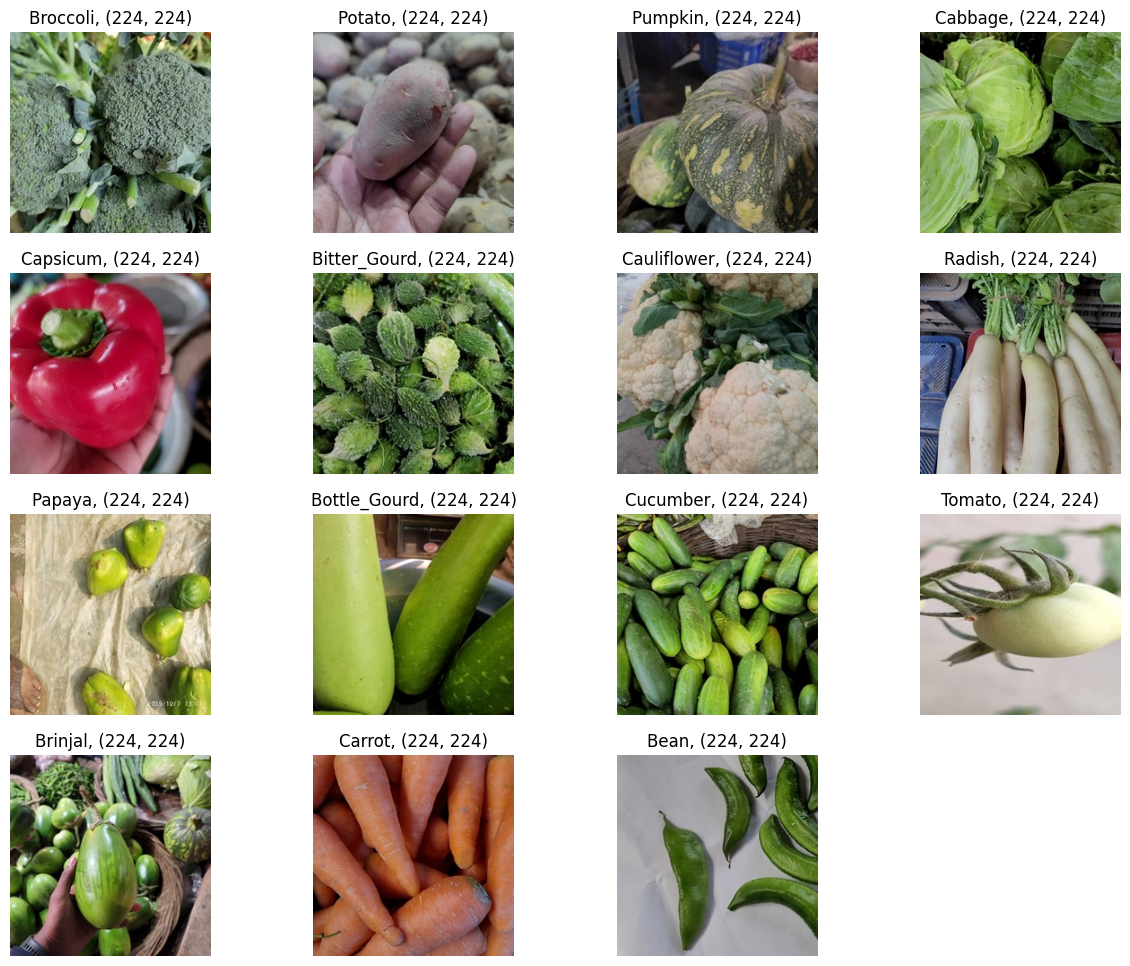

In [ ]:
## Viz Random Sample from each class
plt.figure(figsize=(15, 12))
# iterate over dictionary items (class label, image array)
for i, (cls,img) in enumerate(image_dict.items()):
    # create a subplot axis
    ax = plt.subplot(4, 4, i + 1)
    # plot each image
    plt.imshow(img)
    # set "class name" along with "image size" as title
    plt.title(f'{cls}, {img.size}')
    plt.axis("off")

In [ ]:
# Plot the Data Distribution of Training Data across Classes
df_count_train = pd.DataFrame(list(count_dict.items()), columns=["class", "count"])

print("Count of training samples per class:\n", df_count_train)

Count of training samples per class:
            class  count
0       Broccoli   1000
1         Potato   1000
2        Pumpkin   1000
3        Cabbage   1000
4       Capsicum   1000
5   Bitter_Gourd   1000
6    Cauliflower   1000
7         Radish   1000
8         Papaya   1000
9   Bottle_Gourd   1000
10      Cucumber   1000
11        Tomato   1000
12       Brinjal   1000
13        Carrot   1000
14          Bean   1000


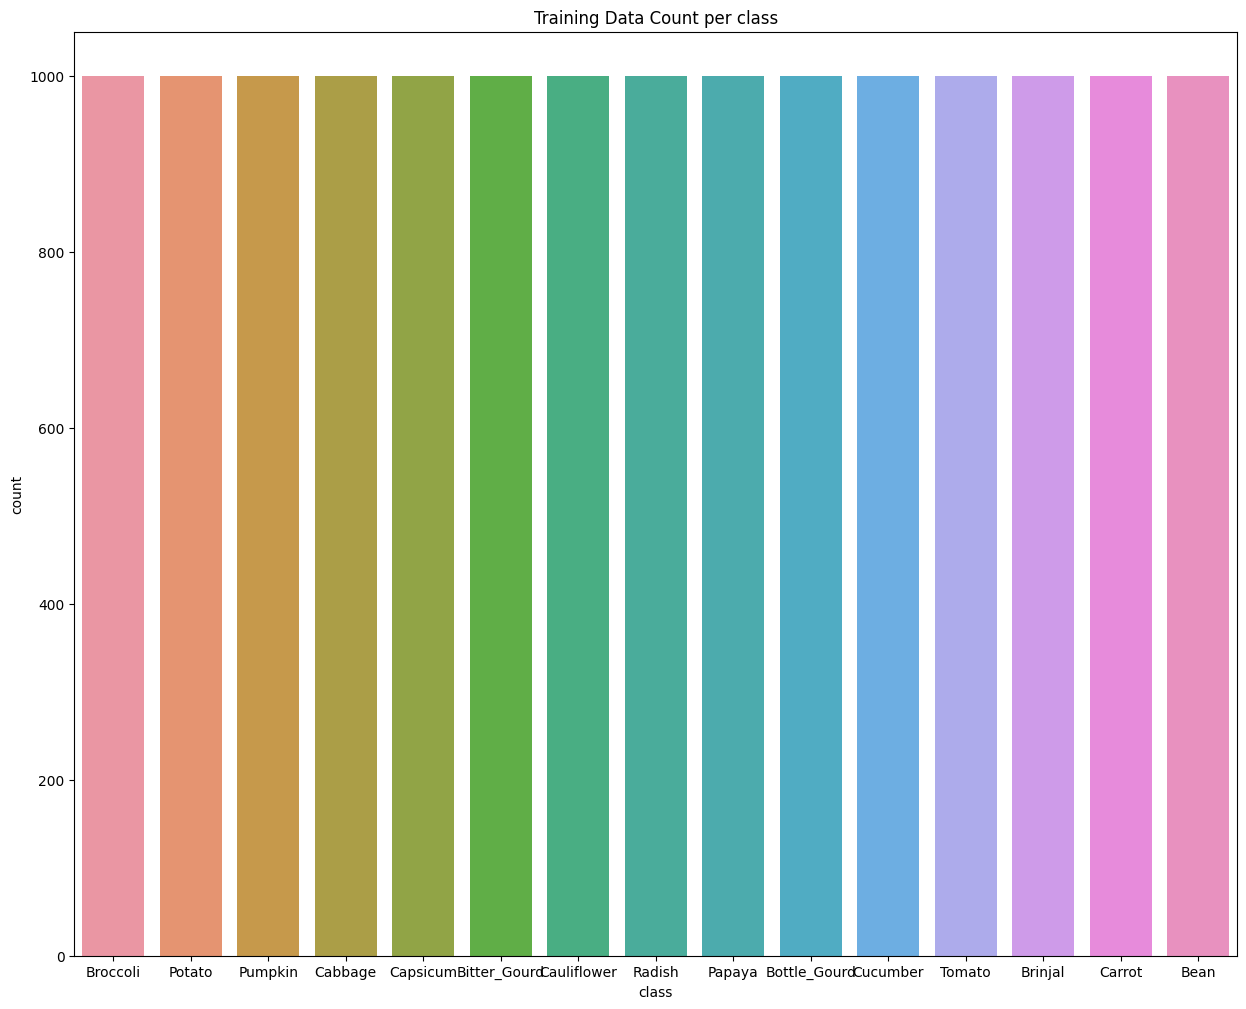

In [ ]:
# Draw a bar plot
plt.figure(figsize=(15, 12))
sns.barplot(x='class', y='count', data=df_count_train)
plt.title("Training Data Count per class")
plt.show()

## Loading Dataset & Data Preprocessing

In [11]:
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

# Set the target height and width of the image
height, width = 224, 224

# Defining PyTorch's data preprocessing transformations
transform = transforms.Compose([
    transforms.Resize((height, width)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])


# Create an ImageFolder dataset
trainset = torchvision.datasets.ImageFolder(root="Vegetable Images/train", transform=transform)

# Create DataLoader
batch_size = 128
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

# Define the ImageFolder dataset for the validation set
valset = torchvision.datasets.ImageFolder(root="Vegetable Images/validation", transform=transform)

# Creating a DataLoader for Validation Sets
valloader = DataLoader(valset, batch_size=batch_size, shuffle=False)

# Define the ImageFolder dataset for the test set
testset = torchvision.datasets.ImageFolder(root="Vegetable Images/test", transform=transform)

# Create the DataLoader for the test set
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

In [ ]:
trainloader

In [30]:
# Define number of classes
num_classes = 15
classes = ['Bean',
           'Bitter_Gourd',
           'Bottle_Gourd',
           'Brinjal',
           'Broccoli',
           'Cabbage',
           'Capsicum',
           'Carrot',
           'Cauliflower',
           'Cucumber',
           'Papaya',
           'Potato',
           'Pumpkin',
           'Radish',
           'Tomato']

## Build the Multi-layer Perceptron Base Model

In [13]:
import torch.nn.functional as F
from torch import nn
from torch import optim

### Define The Network Architecture

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(224*224*3, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 15)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x))
        return x
model_MLP = Network().to(device)
model_MLP

Network(
  (fc1): Linear(in_features=150528, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=15, bias=True)
)

### Train The Network

In [ ]:
# Optimizers require the parameters to optimize and a learning rate
criterion_MLP = nn.NLLLoss().to(device)
optimizer_MLP = optim.Adam(model_MLP.parameters(), lr=0.003)

train_losses_MLP, valid_losses_MLP = [], []
epochs = 10
for e in range(epochs):
    running_train_loss = 0
    for images, labels in trainloader:

        images=images.to(device)
        labels=labels.to(device)

        # Flatten images
        inputs = images.view(images.shape[0],-1).to(device)
        #Training pass
        output=model_MLP(inputs)
        loss = criterion_MLP(output,labels)
        optimizer_MLP.zero_grad()
        loss.backward()
        optimizer_MLP.step()
        running_train_loss += loss.item()

    else:
      running_valid_loss = 0
      with torch.no_grad():
        for images, labels in valloader:
          images=images.to(device)
          labels=labels.to(device)

          inputs = images.view(images.shape[0],-1).to(device)
          output = model_MLP(inputs)
          loss = criterion_MLP(output, labels)
          running_valid_loss += loss.item()

    train_loss=running_train_loss/len(trainloader)
    valid_loss = running_valid_loss/len(valloader)
    train_losses_MLP.append(train_loss)
    valid_losses_MLP.append(valid_loss)


    print(f"Epoch {e + 1}/{epochs} - Training Loss: {train_loss:.4f}")
    print(f"Epoch {e + 1}/{epochs} - Valid Loss: {valid_loss:.4f}")

Epoch 1/5 - Training Loss: 12.1609
Epoch 1/5 - Valid Loss: 1.8529
Epoch 2/5 - Training Loss: 1.5970
Epoch 2/5 - Valid Loss: 1.5274
Epoch 3/5 - Training Loss: 1.2008
Epoch 3/5 - Valid Loss: 1.1970
Epoch 4/5 - Training Loss: 0.9082
Epoch 4/5 - Valid Loss: 1.0007
Epoch 5/5 - Training Loss: 0.7548
Epoch 5/5 - Valid Loss: 0.9462


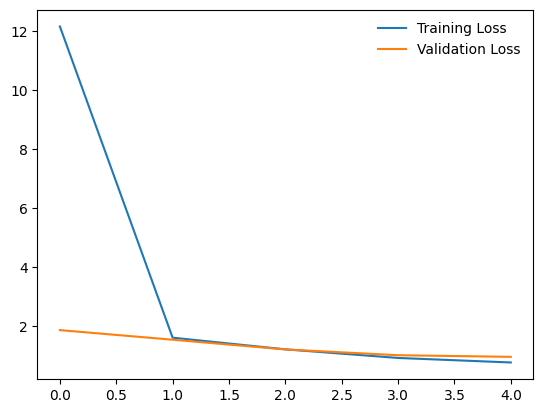

In [ ]:
plt.plot(train_losses_MLP, label='Training Loss')
plt.plot(valid_losses_MLP, label='Validation Loss')
plt.legend(frameon=False)

### Calculate Prediction Accuracy

In [ ]:
# Setting the model to evaluation mode
model_MLP.eval()

# Initialize variables to track overall accuracy and sample size
total_correct = 0
total_samples = 0

# No gradient calculation
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        # Get the output of the model
        inputs = images.view(images.shape[0],-1).to(device)
        outputs = model_MLP(inputs)

        # Getting the category of the forecast
        _, predicted = torch.max(outputs, 1)

        # Update overall accuracy and sample size
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy_MLP = total_correct / total_samples
print('Accuracy on the test set: {:.2%}'.format(accuracy_MLP))

Accuracy on the test set: 66.70%


## Training A Simple CNN Model

### Define the CNN architecture

In [ ]:
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        # convolutional layer (sees 224x224x3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # convolutional layer (sees 112x112x16 tensor)
        #self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # convolutional layer (sees 56x56x32 tensor)
        #self.conv3 = nn.Conv2d(32, 64, 3, padding=1)

        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (112 * 112 * 16 -> 256)
        self.fc1 = nn.Linear(112 * 112 * 16, 256)
        # linear layer (256 -> num_classes)
        self.fc2 = nn.Linear(256, num_classes)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        #x = self.pool(F.relu(self.conv2(x)))
        #x = self.pool(F.relu(self.conv3(x)))
        # flatten image input
        x = x.view(-1, 112*112*16)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        return x

In [ ]:
model_CNN = Net(num_classes).to(device)
model_CNN

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=200704, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=15, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

In [ ]:
# specify loss function (categorical cross-entropy)
criterion_CNN = nn.CrossEntropyLoss().to(device)

# specify optimizer
optimizer_CNN = optim.Adam(model_CNN.parameters(), lr=0.001)

In [ ]:
# number of epochs to train the model
n_epochs = 10

valid_loss_min = np.Inf # track change in validation loss

train_losses_CNN, valid_losses_CNN = [], []

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0

    ###################
    # train the model #
    ###################
    model_CNN.train()
    for images, labels in trainloader:
        # move tensors to GPU
        images=images.to(device)
        labels=labels.to(device)

        # clear the gradients of all optimized variables
        optimizer_CNN.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model_CNN(images)
        # calculate the batch loss
        loss = criterion_CNN(output, labels)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer_CNN.step()
        # update training loss
        train_loss += loss.item()*images.size(0) #here we multiply the batch size to compute the total loss

    ######################
    # validate the model #
    ######################
    model_CNN.eval()
    with torch.no_grad():
      for images, labels in valloader:
        # move tensors to GPU if CUDA is available
        images=images.to(device)
        labels=labels.to(device)

        # forward pass: compute predicted outputs by passing inputs to the model
        output = model_CNN(images)
        # calculate the batch loss
        loss = criterion_CNN(output, labels)
        # update average validation loss
        valid_loss += loss.item()*images.size(0)

    # calculate average losses
    train_loss = train_loss/len(trainloader.sampler) #here we divide the total samples to get the average loss
    valid_loss = valid_loss/len(valloader.sampler)

    train_losses_CNN.append(train_loss)
    valid_losses_CNN.append(valid_loss)

    # print training/validation statistics
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))

    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model_CNN.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 2.633886 	Validation Loss: 1.140486
Validation loss decreased (inf --> 1.140486).  Saving model ...
Epoch: 2 	Training Loss: 1.125494 	Validation Loss: 0.741648
Validation loss decreased (1.140486 --> 0.741648).  Saving model ...
Epoch: 3 	Training Loss: 0.821383 	Validation Loss: 0.616112
Validation loss decreased (0.741648 --> 0.616112).  Saving model ...
Epoch: 4 	Training Loss: 0.648715 	Validation Loss: 0.529791
Validation loss decreased (0.616112 --> 0.529791).  Saving model ...
Epoch: 5 	Training Loss: 0.554678 	Validation Loss: 0.441604
Validation loss decreased (0.529791 --> 0.441604).  Saving model ...
Epoch: 6 	Training Loss: 0.452646 	Validation Loss: 0.386522
Validation loss decreased (0.441604 --> 0.386522).  Saving model ...
Epoch: 7 	Training Loss: 0.391389 	Validation Loss: 0.438285
Epoch: 8 	Training Loss: 0.350686 	Validation Loss: 0.383264
Validation loss decreased (0.386522 --> 0.383264).  Saving model ...
Epoch: 9 	Training Loss: 0.296439 

In [ ]:
model_CNN.load_state_dict(torch.load('model_cifar.pt'))

<All keys matched successfully>

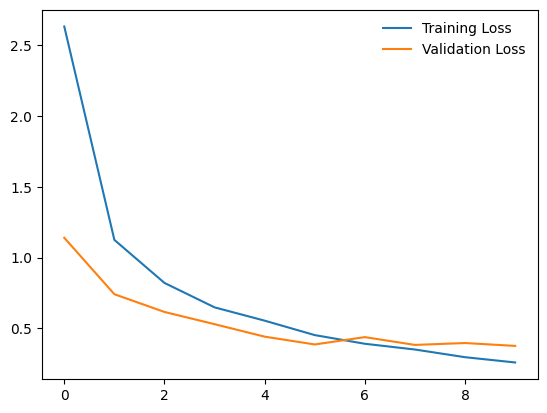

In [ ]:
plt.plot(train_losses_CNN, label='Training Loss')
plt.plot(valid_losses_CNN, label='Validation Loss')
plt.legend(frameon=False)

### Calaulate Prediction Accuracy

In [ ]:
# Setting the model to evaluation mode
model_CNN.eval()

# Initialize variables to track overall accuracy and sample size
total_correct = 0
total_samples = 0

# No gradient calculation
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        # Get outputs of the model
        outputs = model_CNN(images)

        # Getting the category of the forecast
        _, predicted = torch.max(outputs, 1)

        # Update overall accuracy and sample size
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = total_correct / total_samples
print('Accuracy on the test set: {:.2%}'.format(accuracy))

Accuracy on the test set: 90.17%


## Improving CNN Model

### Define the improved CNN architecture

In [ ]:
class Net_imp(nn.Module):
    def __init__(self, num_classes):
        super(Net_imp, self).__init__()
        # convolutional layer (sees 224x224x3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # convolutional layer (sees 112x112x16 tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # convolutional layer (sees 56x56x32 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)

        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (64 * 28 * 28 -> 500)
        self.fc1 = nn.Linear(64 * 28 * 28, 500)
        # linear layer (500 -> num_classes)
        self.fc2 = nn.Linear(500, num_classes)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)


    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # flatten image input
        x = x.view(-1, 64 * 28 * 28)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        #x = self.fc1(x)
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)

        return x

In [ ]:
model_imp_CNN = Net_imp(num_classes).to(device)
model_imp_CNN

Net_imp(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=15, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

In [ ]:
# specify loss function (categorical cross-entropy)
criterion_imp_CNN = nn.CrossEntropyLoss().to(device)

# specify optimizer
optimizer_imp_CNN = optim.Adam(model_imp_CNN.parameters(), lr=0.001)

In [ ]:
# number of epochs to train the model
n_epochs = 20

valid_loss_min = np.Inf # track change in validation loss

train_losses_imp_CNN, valid_losses_imp_CNN = [], []

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0

    ###################
    # train the model #
    ###################
    model_imp_CNN.train()
    for images, labels in trainloader:
        # move tensors to GPU
        images=images.to(device)
        labels=labels.to(device)

        # clear the gradients of all optimized variables
        optimizer_imp_CNN.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model_imp_CNN(images)
        # calculate the batch loss
        loss = criterion_imp_CNN(output, labels)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer_imp_CNN.step()
        # update training loss
        train_loss += loss.item()*images.size(0) #here we multiply the batch size to compute the total loss

    ######################
    # validate the model #
    ######################
    model_imp_CNN.eval()
    with torch.no_grad():
      for images, labels in valloader:
        # move tensors to GPU if CUDA is available
        images=images.to(device)
        labels=labels.to(device)

        # forward pass: compute predicted outputs by passing inputs to the model
        output = model_imp_CNN(images)
        # calculate the batch loss
        loss = criterion_imp_CNN(output, labels)
        # update average validation loss
        valid_loss += loss.item()*images.size(0)

    # calculate average losses
    train_loss = train_loss/len(trainloader.sampler) #here we divide the total samples to get the average loss
    valid_loss = valid_loss/len(valloader.sampler)

    train_losses_imp_CNN.append(train_loss)
    valid_losses_imp_CNN.append(valid_loss)

    # print training/validation statistics
    print('Epoch: {} \tTraining Loss: {:.10f} \tValidation Loss: {:.10f}'.format(
        epoch, train_loss, valid_loss))

    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model_imp_CNN.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 1.0027358941 	Validation Loss: 0.3556222302
Validation loss decreased (inf --> 0.355622).  Saving model ...
Epoch: 2 	Training Loss: 0.2618816513 	Validation Loss: 0.1890021936
Validation loss decreased (0.355622 --> 0.189002).  Saving model ...
Epoch: 3 	Training Loss: 0.1171044436 	Validation Loss: 0.1418813846
Validation loss decreased (0.189002 --> 0.141881).  Saving model ...
Epoch: 4 	Training Loss: 0.0621692511 	Validation Loss: 0.1182077688
Validation loss decreased (0.141881 --> 0.118208).  Saving model ...
Epoch: 5 	Training Loss: 0.0436279071 	Validation Loss: 0.1287010760
Epoch: 6 	Training Loss: 0.0237301758 	Validation Loss: 0.0918606829
Validation loss decreased (0.118208 --> 0.091861).  Saving model ...
Epoch: 7 	Training Loss: 0.0304083325 	Validation Loss: 0.1607977480
Epoch: 8 	Training Loss: 0.0274332355 	Validation Loss: 0.1604301486
Epoch: 9 	Training Loss: 0.0169599461 	Validation Loss: 0.0928341683
Epoch: 10 	Training Loss: 0.0133717757 

In [ ]:
model_imp_CNN.load_state_dict(torch.load('model_cifar.pt'))

<All keys matched successfully>

In [ ]:
plt.plot(train_losses_imp_CNN, label='Training Loss')
plt.plot(valid_losses_imp_CNN, label='Validation Loss')
plt.legend(frameon=False)

NameError: ignored

### Calculate Prediction Accuracy

In [ ]:
# Setting the model to evaluation mode
model_imp_CNN.eval()

# Initialize variables to track overall accuracy and sample size
total_correct = 0
total_samples = 0

# No gradient calculation
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        # Get outputs of the model
        outputs = model_imp_CNN(images)

        # Getting the category of the forecast
        _, predicted = torch.max(outputs, 1)

        # Update overall accuracy and sample size
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = total_correct / total_samples
print('Accuracy on the test set: {:.2%}'.format(accuracy))

Accuracy on the test set: 97.60%


## Building VGG16 Model

In [14]:
import torchvision.models as models

In [ ]:
# Loading pre-trained VGG16 models
vgg16_model = models.vgg16(pretrained=True)

# Print Model Structures
print(vgg16_model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# Define VGG model
vgg16_model.classifier[6] = nn.Linear(4096, num_classes)  # Modify the number of fully connected layer output categories

# Define the loss function and optimizer
criterion_vgg16 = nn.CrossEntropyLoss().to(device)
optimizer_vgg16 = optim.SGD(vgg16_model.parameters(), lr=0.001, momentum=0.9)

# Train the model
n_epochs = 10
vgg16_model.to(device)
criterion_vgg16.to(device)

valid_loss_min = np.Inf # track change in validation loss

train_losses_vgg16, valid_losses_vgg16 = [], []

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0

    ###################
    # train the model #
    ###################
    vgg16_model.train()
    for images, labels in trainloader:
        # move tensors to GPU
        images=images.to(device)
        labels=labels.to(device)

        # clear the gradients of all optimized variables
        optimizer_vgg16.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = vgg16_model(images)
        # calculate the batch loss
        loss = criterion_vgg16(output, labels)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer_vgg16.step()
        # update training loss
        train_loss += loss.item()*images.size(0) #here we multiply the batch size to compute the total loss

    ######################
    # validate the model #
    ######################
    vgg16_model.eval()
    with torch.no_grad():
      for images, labels in valloader:
        # move tensors to GPU if CUDA is available
        images=images.to(device)
        labels=labels.to(device)

        # forward pass: compute predicted outputs by passing inputs to the model
        output = vgg16_model(images)
        # calculate the batch loss
        loss = criterion_vgg16(output, labels)
        # update average validation loss
        valid_loss += loss.item()*images.size(0)

    # calculate average losses
    train_loss = train_loss/len(trainloader.sampler) #here we divide the total samples to get the average loss
    valid_loss = valid_loss/len(valloader.sampler)

    train_losses_vgg16.append(train_loss)
    valid_losses_vgg16.append(valid_loss)

    # print training/validation statistics
    print('Epoch: {} \tTraining Loss: {:.4f} \tValidation Loss: {:.4f}'.format(
        epoch, train_loss, valid_loss))

    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.4f} --> {:.4f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(vgg16_model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.3866 	Validation Loss: 0.0214
Validation loss decreased (inf --> 0.0214).  Saving model ...
Epoch: 2 	Training Loss: 0.0223 	Validation Loss: 0.0077
Validation loss decreased (0.0214 --> 0.0077).  Saving model ...
Epoch: 3 	Training Loss: 0.0092 	Validation Loss: 0.0068
Validation loss decreased (0.0077 --> 0.0068).  Saving model ...
Epoch: 4 	Training Loss: 0.0091 	Validation Loss: 0.0078
Epoch: 5 	Training Loss: 0.0051 	Validation Loss: 0.0034
Validation loss decreased (0.0068 --> 0.0034).  Saving model ...
Epoch: 6 	Training Loss: 0.0054 	Validation Loss: 0.0037
Epoch: 7 	Training Loss: 0.0029 	Validation Loss: 0.0022
Validation loss decreased (0.0034 --> 0.0022).  Saving model ...
Epoch: 8 	Training Loss: 0.0013 	Validation Loss: 0.0018
Validation loss decreased (0.0022 --> 0.0018).  Saving model ...
Epoch: 9 	Training Loss: 0.0016 	Validation Loss: 0.0013
Validation loss decreased (0.0018 --> 0.0013).  Saving model ...
Epoch: 10 	Training Loss: 0.0023 	V

In [ ]:
vgg16_model.load_state_dict(torch.load('model_cifar.pt'))

<All keys matched successfully>

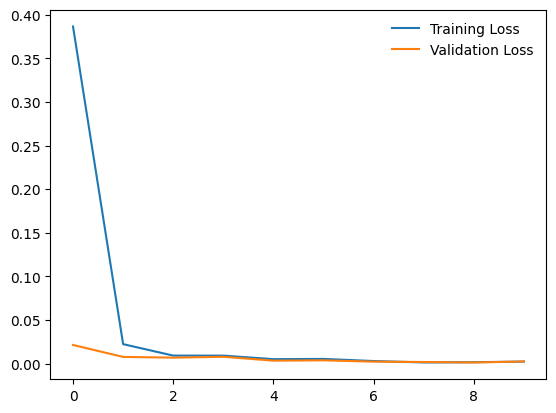

In [ ]:
plt.plot(train_losses_vgg16, label='Training Loss')
plt.plot(valid_losses_vgg16, label='Validation Loss')
plt.legend(frameon=False)

### Calculate Prediction Accuracy

In [ ]:
# Setting the model to evaluation mode
vgg16_model.eval()

# Initialize variables to track overall accuracy and sample size
total_correct = 0
total_samples = 0

# No gradient calculation
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        # Get outputs of the model
        outputs = vgg16_model(images)

        # Getting the category of the forecast
        _, predicted = torch.max(outputs, 1)

        # Update overall accuracy and sample size
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = total_correct / total_samples
print('Accuracy on the test set: {:.2%}'.format(accuracy))

Accuracy on the test set: 99.93%


## Building ResNet Model

In [15]:
# Load pre-trained ResNet model
resnet_model = models.resnet18(pretrained=True)

# Modification of the final fully connected layer to accommodate the number of CIFAR-10 categories
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, num_classes)

# Define the loss function and optimizer
criterion_resnet = nn.CrossEntropyLoss()
optimizer_resnet = torch.optim.Adam(resnet_model.parameters(), lr=0.001)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 151MB/s]


In [16]:
# Setting the model to training mode
resnet_model.train()

# Train the model
n_epochs = 10
resnet_model.to(device)
criterion_resnet.to(device)

valid_loss_min = np.Inf # track change in validation loss

train_losses_resnet, valid_losses_resnet = [], []

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0

    ###################
    # train the model #
    ###################
    resnet_model.train()
    for images, labels in trainloader:
        # move tensors to GPU
        images=images.to(device)
        labels=labels.to(device)

        # clear the gradients of all optimized variables
        optimizer_resnet.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = resnet_model(images)
        # calculate the batch loss
        loss = criterion_resnet(output, labels)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer_resnet.step()
        # update training loss
        train_loss += loss.item()*images.size(0) #here we multiply the batch size to compute the total loss

    ######################
    # validate the model #
    ######################
    resnet_model.eval()
    with torch.no_grad():
      for images, labels in valloader:
        # move tensors to GPU if CUDA is available
        images=images.to(device)
        labels=labels.to(device)

        # forward pass: compute predicted outputs by passing inputs to the model
        output = resnet_model(images)
        # calculate the batch loss
        loss = criterion_resnet(output, labels)
        # update average validation loss
        valid_loss += loss.item()*images.size(0)

    # calculate average losses
    train_loss = train_loss/len(trainloader.sampler) #here we divide the total samples to get the average loss
    valid_loss = valid_loss/len(valloader.sampler)

    train_losses_resnet.append(train_loss)
    valid_losses_resnet.append(valid_loss)

    # print training/validation statistics
    print('Epoch: {} \tTraining Loss: {:.4f} \tValidation Loss: {:.4f}'.format(
        epoch, train_loss, valid_loss))

    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.4f} --> {:.4f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(resnet_model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.1263 	Validation Loss: 0.1361
Validation loss decreased (inf --> 0.1361).  Saving model ...
Epoch: 2 	Training Loss: 0.0457 	Validation Loss: 0.0447
Validation loss decreased (0.1361 --> 0.0447).  Saving model ...
Epoch: 3 	Training Loss: 0.0446 	Validation Loss: 0.0870
Epoch: 4 	Training Loss: 0.0210 	Validation Loss: 0.0085
Validation loss decreased (0.0447 --> 0.0085).  Saving model ...
Epoch: 5 	Training Loss: 0.0122 	Validation Loss: 0.3334
Epoch: 6 	Training Loss: 0.0082 	Validation Loss: 0.0205
Epoch: 7 	Training Loss: 0.0321 	Validation Loss: 0.1988
Epoch: 8 	Training Loss: 0.0578 	Validation Loss: 0.0432
Epoch: 9 	Training Loss: 0.0064 	Validation Loss: 0.0040
Validation loss decreased (0.0085 --> 0.0040).  Saving model ...
Epoch: 10 	Training Loss: 0.0046 	Validation Loss: 0.0058


In [17]:
resnet_model.load_state_dict(torch.load('model_cifar.pt'))

<All keys matched successfully>

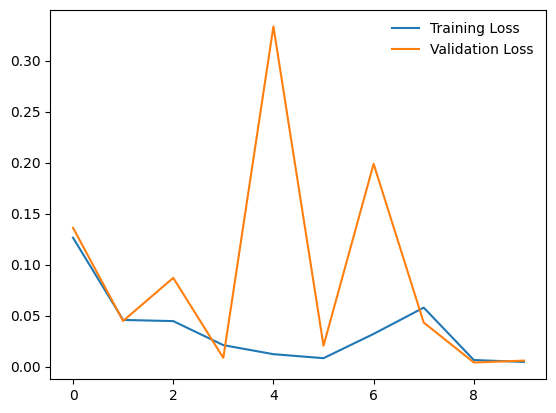

In [18]:
plt.plot(train_losses_resnet, label='Training Loss')
plt.plot(valid_losses_resnet, label='Validation Loss')
plt.legend(frameon=False)

### Calculate Prediction Accuracy

In [19]:
# Setting the model to evaluation mode
resnet_model.eval()

# Initialize variables to track overall accuracy and sample size
total_correct = 0
total_samples = 0

# No gradient calculation
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        # Get outputs of the model
        outputs = resnet_model(images)

        # Getting the category of the forecast
        _, predicted = torch.max(outputs, 1)

        # Update overall accuracy and sample size
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = total_correct / total_samples
print('Accuracy on the test set: {:.2%}'.format(accuracy))

Accuracy on the test set: 99.87%


## Test The Trained Nerwork

The ResNet model and VGG16 model get best prediction accuracy, so we use them to predict our test data

### Test With ResNet Model

In [26]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(15))
class_total = list(0. for i in range(15))
size=len(testset)
predictions = np.zeros(size)
all_classes = np.zeros(size)
all_proba = np.zeros((size,15))
idx=0

resnet_model.eval()
# iterate over test data
for images, labels in testloader:
    # move tensors to GPU if CUDA is available
    images=images.to(device)
    labels=labels.to(device)
    # forward pass: compute predicted outputs by passing inputs to the model
    output = resnet_model(images)
    # calculate the batch loss
    loss = criterion_resnet(output, labels)
    # update test loss
    test_loss += loss.item()*images.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct_tensor = pred.eq(labels.data.view_as(pred))
    #correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    correct = np.squeeze(correct_tensor.cpu().numpy())

    predictions[idx:idx+len(labels)]=pred.to('cpu').numpy()
    all_classes[idx:idx+len(labels)]=labels.to('cpu').numpy()
    all_proba[idx:idx+len(labels),:]=output.to('cpu').detach().numpy()
    idx+=len(labels)

    # calculate test accuracy for each object class
    for i in range(len(labels)):
        label = labels.data[i]
        #if label >= 56:
         #   print(f"Invalid label: {label}")
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(testloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(15):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.005622

Test Accuracy of Potato: 99% (199/200)
Test Accuracy of Papaya: 99% (199/200)
Test Accuracy of Radish: 100% (200/200)
Test Accuracy of Capsicum: 100% (200/200)
Test Accuracy of Brinjal: 100% (200/200)
Test Accuracy of Carrot: 100% (200/200)
Test Accuracy of Cucumber: 100% (200/200)
Test Accuracy of Broccoli: 100% (200/200)
Test Accuracy of Pumpkin: 100% (200/200)
Test Accuracy of Cauliflower: 100% (200/200)
Test Accuracy of Bitter_Gourd: 100% (200/200)
Test Accuracy of Cabbage: 100% (200/200)
Test Accuracy of Tomato: 99% (199/200)
Test Accuracy of Bottle_Gourd: 100% (200/200)
Test Accuracy of  Bean: 99% (199/200)

Test Accuracy (Overall): 99% (2996/3000)


#### Visualize Sample Test Results




In [28]:
# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

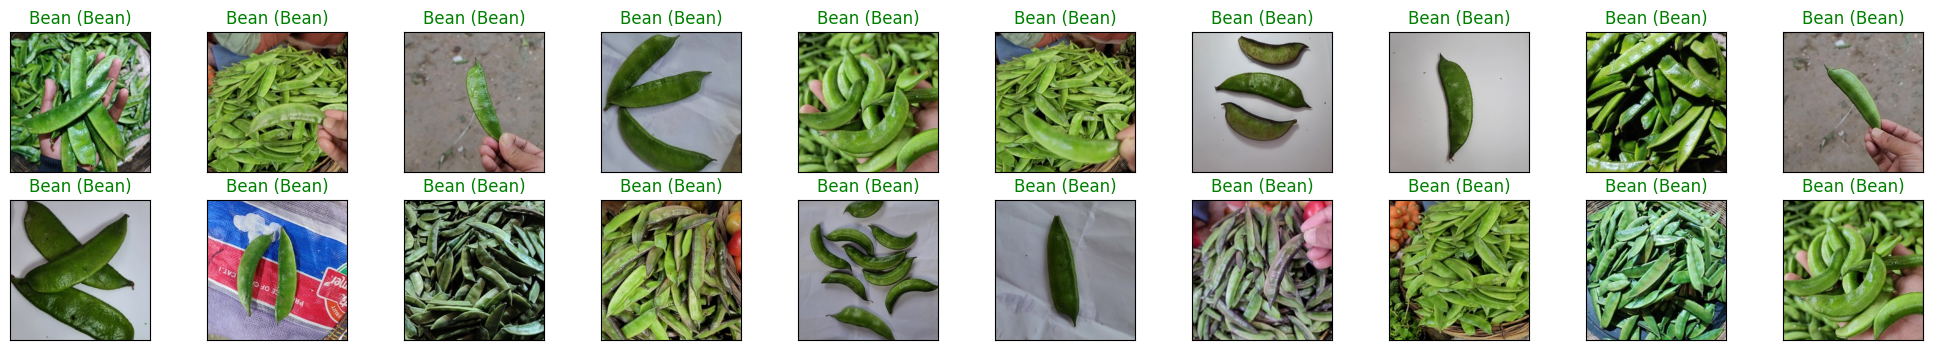

In [37]:
# obtain one batch of test images
dataiter = iter(testloader)
images, labels = next(dataiter)
images.numpy()

# move model inputs to cuda, if GPU available
images = images.cuda()

# get sample outputs
output = resnet_model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
num = np.random.randint(0, 128, 20)
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    imshow(images[idx].cpu())
    ax.set_title("{} ({})".format(classes[preds[num[idx]]], classes[labels[num[idx]]]),
                 color=("green" if preds[num[idx]]==labels[num[idx]].item() else "red"))

### Test With VGG16 Model

In [ ]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(15))
class_total = list(0. for i in range(15))
size=len(testset)
predictions = np.zeros(size)
all_classes = np.zeros(size)
all_proba = np.zeros((size,15))
idx=0

vgg16_model.eval()
# iterate over test data
for images, labels in testloader:
    # move tensors to GPU if CUDA is available
    images=images.to(device)
    labels=labels.to(device)
    # forward pass: compute predicted outputs by passing inputs to the model
    output = vgg16_model(images)
    # calculate the batch loss
    loss = criterion_vgg16(output, labels)
    # update test loss
    test_loss += loss.item()*images.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct_tensor = pred.eq(labels.data.view_as(pred))
    #correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    correct = np.squeeze(correct_tensor.cpu().numpy())

    predictions[idx:idx+len(labels)]=pred.to('cpu').numpy()
    all_classes[idx:idx+len(labels)]=labels.to('cpu').numpy()
    all_proba[idx:idx+len(labels),:]=output.to('cpu').detach().numpy()
    idx+=len(labels)

    # calculate test accuracy for each object class
    for i in range(len(labels)):
        label = labels.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(testloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(15):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

#### Visualize Sample Test Results

In [ ]:
# obtain one batch of test images
dataiter = iter(testloader)
images, labels = next(dataiter)
images.numpy()

# move model inputs to cuda, if GPU available
images = images.cuda()

# get sample outputs
output = vgg16_model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
num = np.random.randint(0, 128, 20)
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    imshow(images[idx].cpu())
    ax.set_title("{} ({})".format(classes[preds[num[idx]]], classes[labels[num[idx]]]),
                 color=("green" if preds[num[idx]]==labels[num[idx]].item() else "red"))

## Summary

### Simple MLP:
Despite its simplicity, the simple Multi-layer Perceptron Model exhibits challenges in accurately classifying certain items, resulting in a test accuracy of approximately 65%.

### CNN Model:
The CNN model demonstrates strong performance on the dataset, achieving a commendable 90% test accuracy.

### Improved CNN Model:
Enhancements to the model, including increased depth, the incorporation of Batch Normalization, and Dropout layers, lead to remarkable improvements. The improved CNN model achieves a test accuracy exceeding 97%.

### VGG16 & ResNet Model:
Leveraging VGG16 & ResNet Models  proves highly effective across various architectures. Models showcase exceptional performance, yielding impressive test accuracies exceeding 99%.